# Setup enviorment

In [1]:
# Data reading in Dataframe format and data preprocessing
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear algebra operations
import numpy as np

# Epiweek
from epiweeks import Week, Year

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Read dataset

In [3]:
file = 'dengue_tabular.csv'

dengue_dataset = pd.read_csv(file)
dengue_dataset.head()

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,2022/w40,2022/w41,2022/w42,2022/w43,2022/w44,2022/w45,2022/w46,2022/w47,2022/w48,2022/w49
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,...,8.0,4.0,8.0,6.0,7.0,5.0,10.0,7.0,1.0,0.0
1,5002,Abejorral,20643,20944,21197,21355,20973,20067,19732,19796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5004,Abriaquí,2261,2290,2321,2353,2386,2424,2471,2488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5021,Alejandría,3935,4020,4096,4171,4244,4337,4419,4467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5030,Amagá,27996,28331,28624,28839,28776,28371,28259,28432,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Sociodemographic and socioeconomic data

In [4]:
def get_social_data(file):
    columns = ['Municipality code', 'Municipality']
    data = pd.read_csv(file)
    socodemographic_df = data.iloc[:,:53]
    return socodemographic_df

In [5]:
socodemographic_df = get_social_data(file)
socodemographic_df.head()

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,Householdswithoutwateraccess(%),Householdswithoutinternetaccess(%),Buildingstratification1(%),Buildingstratification2(%),Buildingstratification3(%),Buildingstratification4(%),Buildingstratification5(%),Buildingstratification6(%),NumberofhospitalsperKm2,NumberofhousesperKm2
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,...,1.44,29.47,12.1117,31.2817,26.0471,9.0279,6.4855,3.7062,1.555263,2102.057895
1,5002,Abejorral,20643,20944,21197,21355,20973,20067,19732,19796,...,21.87,56.27,31.3520,33.8306,2.0439,0.0352,0.0117,0.0000,0.002012,11.945674
2,5004,Abriaquí,2261,2290,2321,2353,2386,2424,2471,2488,...,24.03,62.35,21.5705,39.1675,4.3519,0.0946,0.1892,0.1892,0.000000,2.548276
3,5021,Alejandría,3935,4020,4096,4171,4244,4337,4419,4467,...,17.06,54.61,17.9879,38.5721,4.8215,0.1854,0.0464,0.0464,0.006623,9.092715
4,5030,Amagá,27996,28331,28624,28839,28776,28371,28259,28432,...,3.31,56.12,27.8784,42.0280,3.4086,0.1889,0.1460,0.0172,0.011765,102.752941


In [6]:
socodemographic_df.describe()

,Municipality code,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,Population2015,...,Householdswithoutwateraccess(%),Householdswithoutinternetaccess(%),Buildingstratification1(%),Buildingstratification2(%),Buildingstratification3(%),Buildingstratification4(%),Buildingstratification5(%),Buildingstratification6(%),NumberofhospitalsperKm2,NumberofhousesperKm2
count,1121.000000,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,38666.503122,3.830083e+04,3.872660e+04,3.914528e+04,3.956012e+04,3.995886e+04,4.033605e+04,4.069779e+04,4.105313e+04,4.141868e+04,...,24.416548,67.050259,40.441472,23.299101,4.191358,0.570642,0.166528,0.073571,0.030327,44.761647
std,26534.109802,2.349465e+05,2.372341e+05,2.394122e+05,2.415079e+05,2.434845e+05,2.452775e+05,2.466488e+05,2.476931e+05,2.485725e+05,...,19.909384,13.683275,22.624413,17.788464,7.314261,2.001266,0.914746,0.398665,0.164840,211.005361
min,5001.000000,0.000000e+00,1.270000e+02,1.270000e+02,1.290000e+02,1.440000e+02,1.590000e+02,1.720000e+02,1.920000e+02,2.100000e+02,...,0.000000,9.980000,0.343200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010674
25%,15676.000000,6.373000e+03,6.505000e+03,6.583000e+03,6.632000e+03,6.689000e+03,6.586000e+03,6.496000e+03,6.520000e+03,6.433000e+03,...,9.530000,59.650000,22.333200,6.847300,0.168200,0.000000,0.000000,0.000000,0.001163,5.266833
50%,25839.000000,1.200400e+04,1.220600e+04,1.232500e+04,1.252800e+04,1.260300e+04,1.256800e+04,1.267200e+04,1.267900e+04,1.268000e+04,...,18.910000,68.380000,38.293200,21.639500,0.824900,0.049200,0.000000,0.000000,0.004435,11.733333
75%,66456.000000,2.422200e+04,2.464200e+04,2.483100e+04,2.516200e+04,2.548000e+04,2.570500e+04,2.595700e+04,2.627200e+04,2.633500e+04,...,34.200000,76.690000,57.815300,36.575400,4.929100,0.152300,0.038800,0.017300,0.011628,24.137931
max,99773.000000,6.866363e+06,6.936977e+06,7.003434e+06,7.065669e+06,7.119281e+06,7.162261e+06,7.197326e+06,7.226652e+06,7.253823e+06,...,98.330000,95.430000,94.175500,77.665400,51.918800,26.060600,20.620500,5.533400,3.433735,4876.176471


## 3. Climatic data

In [7]:
def get_climatic_data(file):
    
    data = pd.read_csv(file)
    
    columns = ['Municipality code', 'Municipality']
    names = data[columns]
    
    climatic_df = data.iloc[:,53:341]
    
    # Merge:
    climatic_df = pd.concat([names, climatic_df], axis=1)
    
    return climatic_df

In [8]:
climatic_df = get_climatic_data(file)
climatic_df.head()

,Municipality code,Municipality,TEMPERATURE_jan_07,TEMPERATURE_feb_07,TEMPERATURE_mar_07,TEMPERATURE_apr_07,TEMPERATURE_may_07,TEMPERATURE_jun_07,TEMPERATURE_jul_07,TEMPERATURE_aug_07,...,PRECIPITATION_mar_18,PRECIPITATION_apr_18,PRECIPITATION_may_18,PRECIPITATION_jun_18,PRECIPITATION_jul_18,PRECIPITATION_aug_18,PRECIPITATION_sep_18,PRECIPITATION_oct_18,PRECIPITATION_nov_18,PRECIPITATION_dec_18
0,5001,Medellín,21.009283,20.982925,21.425911,21.237032,21.322522,21.243176,21.686978,20.866394,...,140.323318,267.799438,418.379303,219.436752,180.841248,200.803131,294.888611,302.151306,276.914551,67.528000
1,5002,Abejorral,16.566818,16.545661,16.853578,16.592266,16.764218,16.744885,16.738302,16.154948,...,145.937302,266.998016,456.432129,191.030685,171.043686,202.056366,263.658752,274.999481,276.055359,60.356739
2,5004,Abriaquí,16.988332,16.940564,17.444237,17.463490,17.461414,17.357063,17.557740,16.717581,...,111.904190,214.366913,374.212677,225.602829,160.006393,216.341446,273.485809,267.168549,257.440796,63.571411
3,5021,Alejandría,20.606707,20.672624,21.210392,21.113854,21.331241,21.114738,21.333450,20.634999,...,147.506775,292.958588,436.878143,225.225449,195.619019,256.421906,302.413086,353.701385,277.470184,61.464046
4,5030,Amagá,20.814870,20.851651,21.328261,21.144019,21.174519,20.900712,21.281823,20.447760,...,117.747261,256.695129,421.436859,195.391815,162.015167,182.192062,274.654327,259.078125,282.538574,68.923813


### 3.1. Get temperature

In [9]:
def get_date(name):
    
    # Get month as number
    month = name.split('_')[1]
    dic = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12
    }
    month = dic[month]
    
    # Year
    year = name.split('_')[2]
    year = '20' + year
    
    date = pd.to_datetime(f'{year}-{month}-01')
    
    return date

In [10]:
def get_temperature(file):
    data = pd.read_csv(file)
    
    columns = []
    for column in data.columns:
        if 'TEMPERATURE' in column:
            columns.append(column)
            
    temperature_df = data[columns]
    
    # rename
    temperature_df.columns = temperature_df.columns.to_series().apply(get_date)
    
    columns = ['Municipality code', 'Municipality']
    names = data[columns]
    
    # Merge:
    temperature_df = pd.concat([names, temperature_df], axis=1)
    
    return temperature_df

In [11]:
temperature_df = get_temperature(file)
temperature_df.head()

,Municipality code,Municipality,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00
0,5001,Medellín,21.009283,20.982925,21.425911,21.237032,21.322522,21.243176,21.686978,20.866394,...,21.726171,21.124271,21.037365,21.457151,21.952168,21.719432,21.347202,20.748416,20.886703,20.936353
1,5002,Abejorral,16.566818,16.545661,16.853578,16.592266,16.764218,16.744885,16.738302,16.154948,...,17.169984,16.471953,16.495468,17.036293,17.063302,17.103385,17.011875,16.495094,16.674297,16.627245
2,5004,Abriaquí,16.988332,16.940564,17.444237,17.463490,17.461414,17.357063,17.557740,16.717581,...,17.833994,17.378247,17.221657,17.529025,17.843157,17.512112,17.356325,16.911367,17.231535,17.080420
3,5021,Alejandría,20.606707,20.672624,21.210392,21.113854,21.331241,21.114738,21.333450,20.634999,...,21.489558,20.985991,21.025772,21.377411,21.652374,21.425886,21.230342,20.725872,20.687894,20.574121
4,5030,Amagá,20.814870,20.851651,21.328261,21.144019,21.174519,20.900712,21.281823,20.447760,...,21.648314,21.020582,20.880769,21.149931,21.560988,21.380573,21.026458,20.558420,20.625113,20.717262


### Plot Temperature

In [12]:
def filter_df(df, municipality):
    df = df[df.Municipality == municipality]
    df = df.iloc[:,2:]
    return df.T

In [13]:
"""
Function to show histograms of 3 municipalities

1. You must pass the list of the names of the 3 municipalities as they appear in the dataset
Example:
-> Medellín
-> Cali
-> Popayán

2. With those names you form a list like this:
-> municipalities = ['Medellín', 'Cali', 'Popayán']

3. You call the function like this:
where df is the dataframe with the data
-> plot_histogram(df, municipalities)

Optional:
you can change the color by putting a color between the parentheses, like this:
-> plot_histogram(df, municipalities, color='#fcba03')

In this case the color is '#fcba03', but you can also use the name, like:
-> plot_histogram(df, municipalities, color='Blue')
"""

def plot_histogram(df, municipalities, variable='', color='#fcba03'):

    plt.gcf().set_size_inches(15, 8)
    
    plt.subplot(1, 3, 1)
    dfaux = filter_df(df, municipalities[0])
    sns.distplot(dfaux.iloc[:,0], bins=20, color=color, axlabel=variable)
    plt.title(f'{variable} - {municipalities[0]}')

    plt.subplot(1, 3, 2)
    dfaux = filter_df(df, municipalities[1])
    sns.distplot(dfaux.iloc[:,0], bins=20, color=color, axlabel=variable)
    plt.title(f'{variable} - {municipalities[1]}')
    
    plt.subplot(1, 3, 3)
    dfaux = filter_df(df, municipalities[2])
    sns.distplot(dfaux.iloc[:,0], bins=20, color=color, axlabel=variable)
    plt.title(f'{variable} - {municipalities[2]}')

    plt.show()

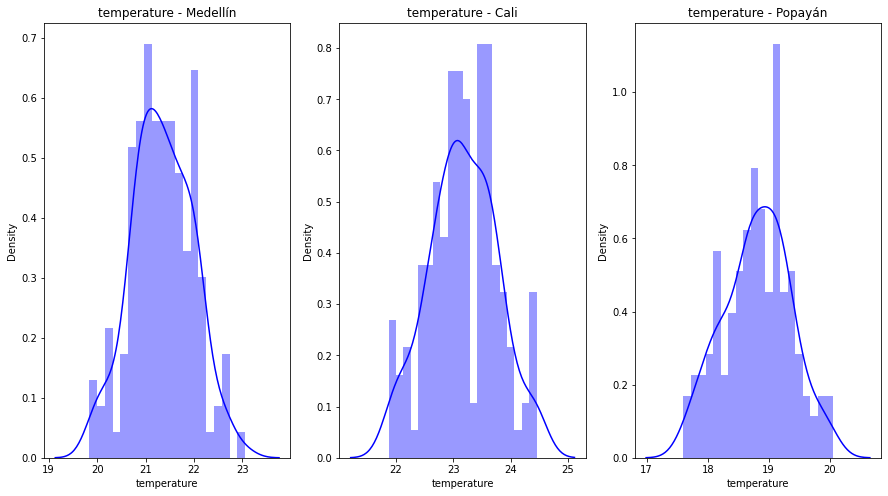

In [14]:
municipalities = ['Medellín', 'Cali', 'Popayán']
plot_histogram(temperature_df, municipalities, variable='temperature', color='BLUE')

### 3.2. Get precipitation

In [15]:
def get_precipitation(file):
    data = pd.read_csv(file)
    
    columns = []
    for column in data.columns:
        if 'PRECIPITATION' in column:
            columns.append(column)
            
    precipitation_df = data[columns]
    
    # rename
    precipitation_df.columns = precipitation_df.columns.to_series().apply(get_date)
    
    columns = ['Municipality code', 'Municipality']
    names = data[columns]
    
    # Merge:
    precipitation_df = pd.concat([names, precipitation_df], axis=1)
    
    return precipitation_df

In [16]:
precipitation_df = get_precipitation(file)
precipitation_df.head()

,Municipality code,Municipality,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00
0,5001,Medellín,65.411400,49.307404,195.452469,291.927124,345.532501,157.963028,386.515533,230.007416,...,140.323318,267.799438,418.379303,219.436752,180.841248,200.803131,294.888611,302.151306,276.914551,67.528000
1,5002,Abejorral,73.411079,55.334660,211.111679,298.137146,368.622955,145.024872,337.009155,245.224106,...,145.937302,266.998016,456.432129,191.030685,171.043686,202.056366,263.658752,274.999481,276.055359,60.356739
2,5004,Abriaquí,53.842678,37.477692,152.713318,246.919952,334.840881,152.230927,422.573364,221.506516,...,111.904190,214.366913,374.212677,225.602829,160.006393,216.341446,273.485809,267.168549,257.440796,63.571411
3,5021,Alejandría,66.638855,66.628891,199.928375,286.881470,345.874695,161.073792,339.436737,324.082489,...,147.506775,292.958588,436.878143,225.225449,195.619019,256.421906,302.413086,353.701385,277.470184,61.464046
4,5030,Amagá,62.527489,46.315376,166.522003,288.957397,350.666260,143.757507,350.168793,210.302658,...,117.747261,256.695129,421.436859,195.391815,162.015167,182.192062,274.654327,259.078125,282.538574,68.923813


### Plot Precipitation

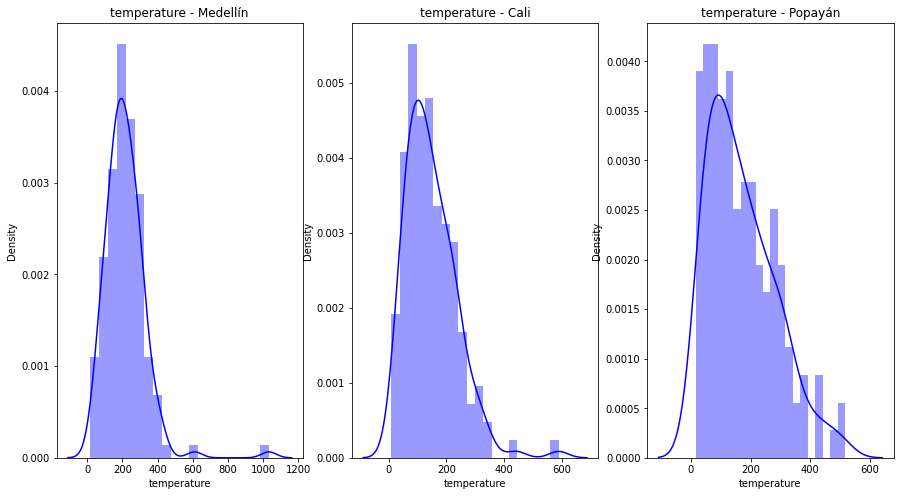

In [17]:
municipalities = ['Medellín', 'Cali', 'Popayán']
plot_histogram(precipitation_df, municipalities, variable='temperature', color='BLUE')

# 4. Dengue Cases

In [18]:
def get_epiweek(name, date, end_date):
    
    # Get week
    week = name.split('/')[1]
    week = week.replace('w','')
    week = int(week)
    
    # Year
    year = name.split('/')[0]
    year = int(year)
    
    epiweek = Week(year, week)
    
    if date:
        if end_date:
            epiweek = epiweek.enddate()
        else:
            epiweek = epiweek.startdate()
    
    return epiweek

In [19]:
def get_dengue_cases(file, epiweek=True, date = True, end_date=True):
    
    data = pd.read_csv(file)
    
    columns = ['Municipality code', 'Municipality']
    names = data[columns]
    
    cases = data.iloc[:,341:]
    # epiweek
    if epiweek:
        cases.columns = cases.columns.to_series().apply(get_epiweek, args=(date,end_date))
    
    # Merge:
    cases = pd.concat([names, cases], axis=1)
    
    return cases

In [20]:
cases_df = get_dengue_cases(file, epiweek=True, date = True, end_date=True)
cases_df

,Municipality code,Municipality,2007-01-06,2007-01-13,2007-01-20,2007-01-27,2007-02-03,2007-02-10,2007-02-17,2007-02-24,...,2022-10-08,2022-10-15,2022-10-22,2022-10-29,2022-11-05,2022-11-12,2022-11-19,2022-11-26,2022-12-03,2022-12-10
0,5001,Medellín,1,0,0,0,0,0,0,0,...,8.0,4.0,8.0,6.0,7.0,5.0,10.0,7.0,1.0,0.0
1,5002,Abejorral,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5004,Abriaquí,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5021,Alejandría,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5030,Amagá,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1117,99001,Puerto Carreño,0,1,1,2,2,1,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1118,99524,La Primavera,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1119,99624,Santa Rosalía,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Plot dengue cases

In [21]:
""" 
Function to plot the time series
"""
def plot_cases(df, municipalities):
    
    plt.figure(figsize = (14, 8))
    
    for municipality in municipalities:
        df_aux = filter_df(df, municipality)
        plt.plot(df_aux.index, df_aux.iloc[:,0], label=municipality)
    
    plt.xlabel('Date') 
    plt.ylabel('Dengue Cases')
    plt.title('Dengue Cases')
    
    plt.legend()
    plt.show()

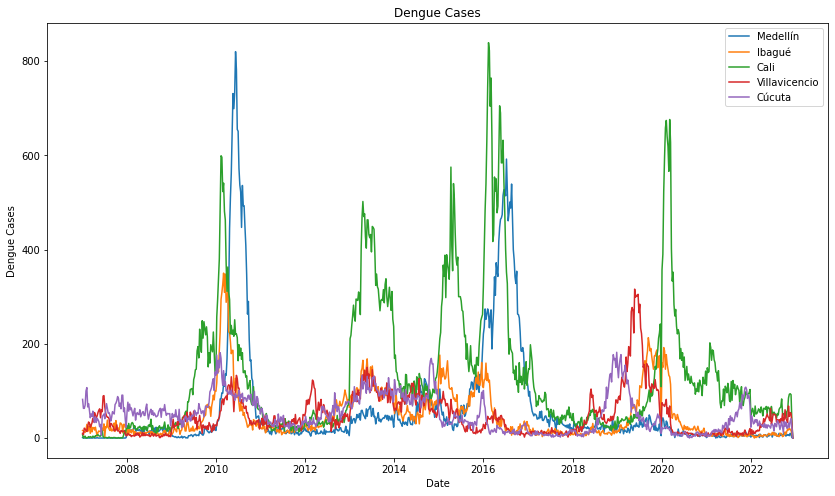

In [23]:
municipalities = ['Medellín', 'Ibagué', 'Cali', 'Villavicencio', 'Cúcuta']
plot_cases(cases_df, municipalities)